
Exploratory Data analysis

In [12]:
import pandas as pd
from matplotlib import pyplot as plt
import numpy as np
%matplotlib inline

import seaborn as sns
import missingno as msno
from prettytable import PrettyTable

import warnings
warnings.filterwarnings('ignore')

In [14]:

data = pd.read_csv('C:/Users/surya/Downloads/project files/Customer-Churn-Records.csv')

# Define a function to create count plots for univariate analysis
def countplot_univariate(data, column, hue, label, max_sample, num_x_ticks, x_ticks, width, height, y_title, orient, title):
    
    # Create a new figure with the specified width, height, and title
    plt.figure(figsize=(width, height))
    plt.suptitle(f'{title}', y=y_title)

    # Determine the order of the categories based on the maximum sample size
    order = data[column].value_counts().nlargest(max_sample).index if max_sample > 0 else data[column].value_counts().index

    # Create a countplot based on the specified orientation
    if orient == 'vertical':
        g = sns.countplot(x=column, hue=hue, order=order, data=data, palette='muted')
        g.set(xlabel=label, ylabel='Number')
    elif orient == 'horizontal':
        g = sns.countplot(y=column, hue=hue, order=order, data=data, palette='muted')
        g.set(xlabel='Number', ylabel=label)

    plt.legend(title='Exited', labels=['Retain', 'Churn'], fontsize=11)

    # Customize the x-axis ticks if the number of ticks is specified
    if num_x_ticks > 0:
        x_ticks_list = list(range(num_x_ticks))
        plt.xticks(x_ticks_list, x_ticks, fontsize=11)

    # Calculate the total number of observations
    total = len(data[column])

    # Add percentage annotations to the bars
    for p in g.patches:
        if orient == 'vertical':
            height = p.get_height()
            percentage = (height / total) * 100
            g.annotate(f'{percentage:.1f}%', (p.get_x() + (p.get_width() + 0.05) / 2, height + 50), \
                            ha='center', va='bottom', fontsize=12)
        elif orient == 'horizontal':
            width = p.get_width()
            percentage = (width / total) * 100
            g.annotate(f'{percentage:.1f}%', (width + 25, p.get_y() + p.get_height() / 2), \
                       ha='left', va='center', fontsize=11)
            
        plt.show()


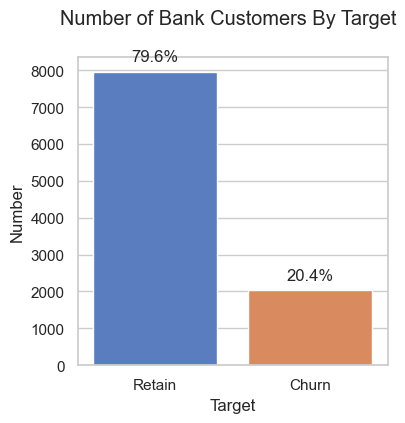

In [20]:


# Set the theme for seaborn plots
sns.set_theme(style="whitegrid")

# Define the chart title
chart = 'Number of Bank Customers By Target'

# Create a new figure with the specified size and title
plt.figure(figsize=(4, 4))
plt.suptitle(f'{chart}', y=1)

# Plot a countplot based on the target variable 'Exited'
g = sns.countplot(x='Exited', data=data, palette='muted')
g.set(ylabel='Number', xlabel='Target')

# Customize x-axis ticks
plt.xticks([0, 1], ['Retain', 'Churn'], fontsize=11)

# Annotate the percentage on the chart
total = len(data['Exited'])
for p in g.patches:
    height = p.get_height()
    percentage = (height / total) * 100
    g.annotate(f'{percentage:.1f}%', (p.get_x() + p.get_width() / 2, height + 200), ha='center', va='bottom', fontsize=12)

# Display the plot
plt.show()


Visualizing the Number of Bank Customers by Gender


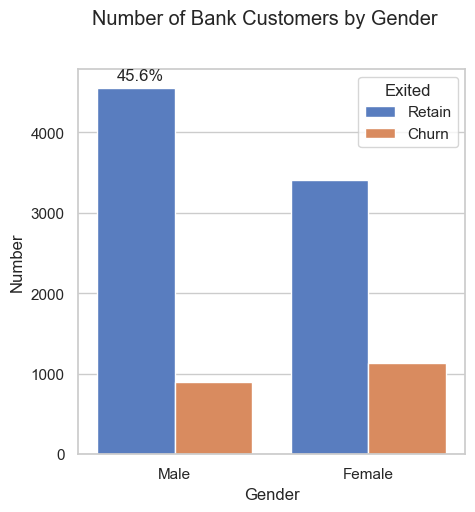

In [26]:
# Define the chart title
chart = 'Number of Bank Customers by Gender'

# Apply the countplot_univariate function to plot the chart
countplot_univariate(data, 'Gender', 'Exited', 'Gender', 0, 0, None, 5, 5, 1, 'vertical', chart)


Visualizing the Number of Bank Customers by Age Group

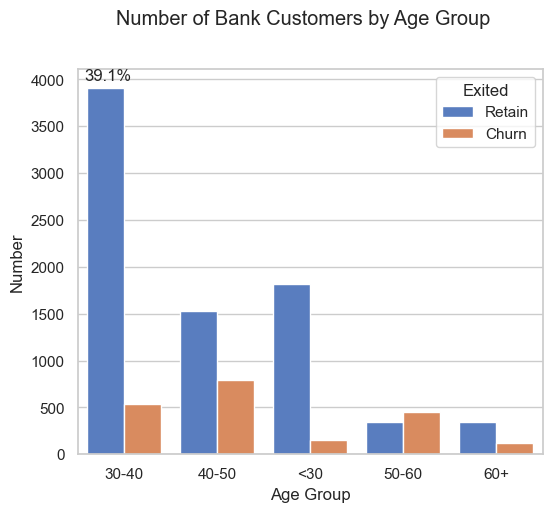

In [39]:
# Initialize chart title
data['Age Group'] = pd.cut(data['Age'], bins=[0, 30, 40, 50, 60, np.inf], labels=['<30', '30-40', '40-50', '50-60', '60+'])

chart = 'Number of Bank Customers by Age Group'

# Apply the countplot_univariate function to plot the chart
countplot_univariate(data, 'Age Group', 'Exited', 'Age Group', 0, 0, None, 6, 5, 1, 'vertical', chart)


Visualizing the Number of Bank Customers by Geography

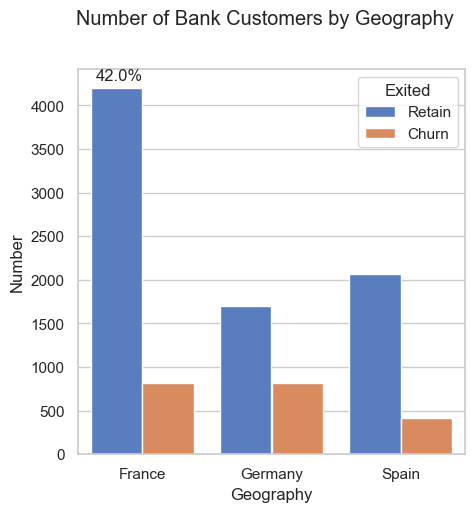

In [46]:
# Initialize chart title
chart = 'Number of Bank Customers by Geography'

# Apply the countplot_univariate function to plot the chart
countplot_univariate(data, 'Geography', 'Exited', 'Geography', 0, 0, None, 5, 5, 1, 'vertical', chart)


Visualizing the Number of Bank Customers by Credit Card Ownership Status

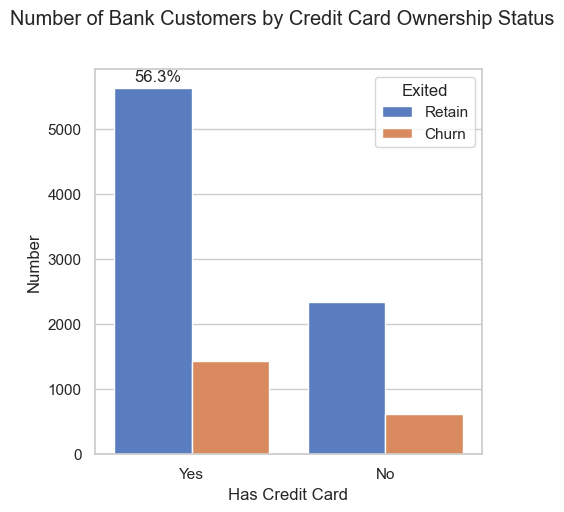

In [53]:
# Initialize chart title
chart = 'Number of Bank Customers by Credit Card Ownership Status'

# Apply the countplot_univariate function to plot the chart
countplot_univariate(data, 'HasCrCard', 'Exited', 'Has Credit Card', 0, 2, ['Yes', 'No'], 5, 5, 1, 'vertical', chart)


Visualizing the Number of Bank Customers by Card Type

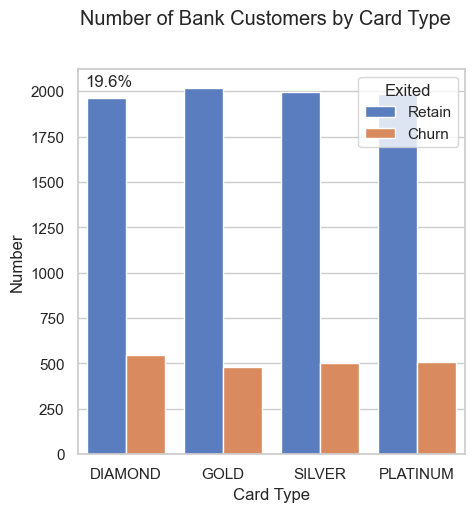

In [58]:
# Initialize chart title
chart = 'Number of Bank Customers by Card Type'

# Apply the countplot_univariate function to plot the chart
countplot_univariate(data, 'Card Type', 'Exited', 'Card Type', 0, 0, None, 5, 5, 1, 'vertical', chart)


Visualizing the Number of Bank Customers by Number of Products

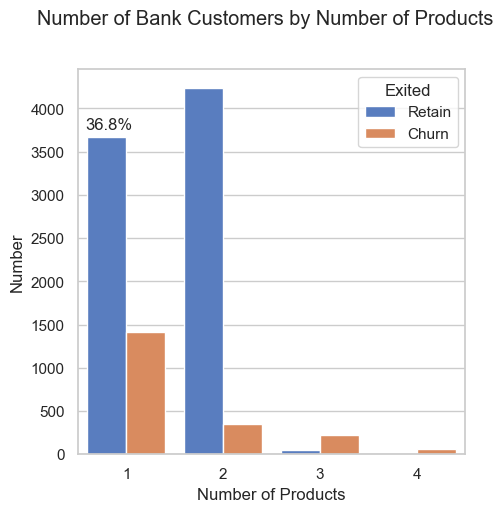

In [64]:
# Initialize chart title
chart = 'Number of Bank Customers by Number of Products'

# Apply the countplot_univariate function to plot the chart
countplot_univariate(data, 'NumOfProducts', 'Exited', 'Number of Products', 0, 0, None, 5, 5, 1, 'vertical', chart)


Visualizing the Number of Bank Customers by Satisfaction Score


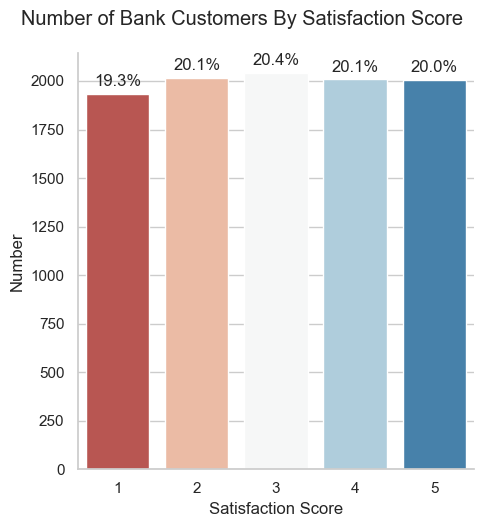

In [73]:
# Initialize chart title
chart = 'Number of Bank Customers By Satisfaction Score'

# Create a count plot for Satisfaction Score
g = sns.catplot(x='Satisfaction Score', data=data, kind='count', height=5, palette='RdBu')
g.set(ylabel='Number', xlabel='Satisfaction Score')
g.fig.suptitle(f'{chart}', y=1.05)

# Calculate the total number of observations
total = len(data)

# Annotate the percentage on the chart
for p in g.ax.patches:
    height = p.get_height()
    percentage = (height / total) * 100
    g.ax.annotate(f'{percentage:.1f}%', (p.get_x() + p.get_width() / 2., height + 25),
                  ha='center', va='bottom', fontsize=12)

# Display the plot
plt.show()


Preparing Data for Churn Status Visualization

In [78]:
# Set the theme for seaborn plots
sns.set_theme(style="white")

# Create a copy of the dataset
data2 = data.copy()

# Map 'Exited' values to 'Churn' and 'Retain' labels
data2['Churn Status'] = data2['Exited'].map({1: 'Churn', 0: 'Retain'})


Plotting Boxplot and Histplot for Bivariate Analysis

In [85]:
# Define a function to plot boxplot and histplot for bivariate analysis
def distribution_bivariate(data, x, y, hue, width, height, label):
    
    # Create a new figure with the specified width and height
    fig, axes = plt.subplots(1, 2, figsize=(width, height))

    # Create a boxplot based on the specified parameters
    sns.boxplot(ax=axes[0], y=y, x=x, showmeans=True, palette='muted', data=data)
    axes[0].set_title(f'Boxplot of {label} by Churn Status', y=1.05)

    # Create a histplot based on the specified parameters
    sns.histplot(ax=axes[1], data=data, x=y, hue=hue, kde=True, palette='muted')
    axes[1].set_title(f'Histogram of {label} by Churn Status', y=1.05)

    # Adjust layout for better fit
    plt.tight_layout()
    plt.show()


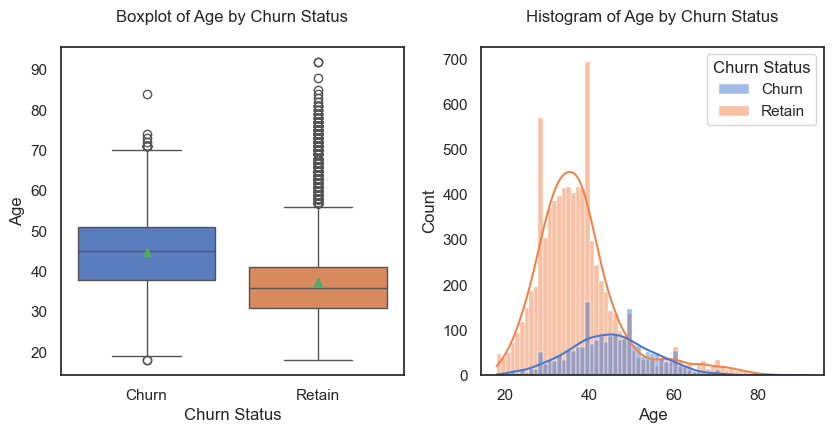

In [87]:
distribution_bivariate(data2, 'Churn Status', 'Age', 'Churn Status', 8.5, 4.5, 'Age')

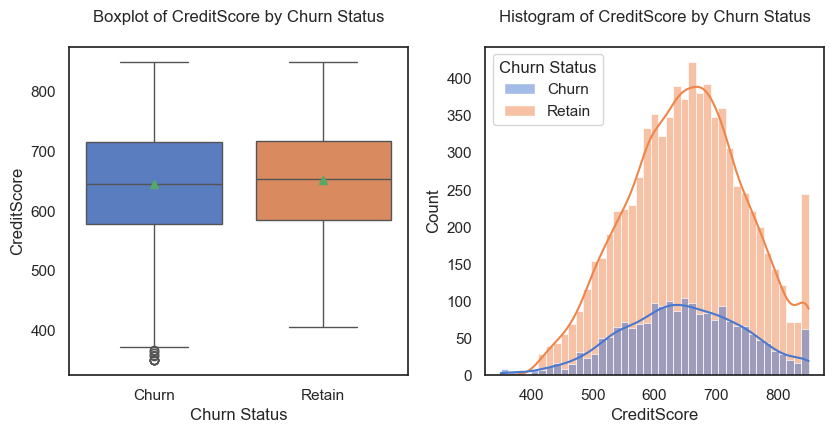

In [89]:
distribution_bivariate(data2, 'Churn Status', 'CreditScore', 'Churn Status', 8.5, 4.5, 'CreditScore')

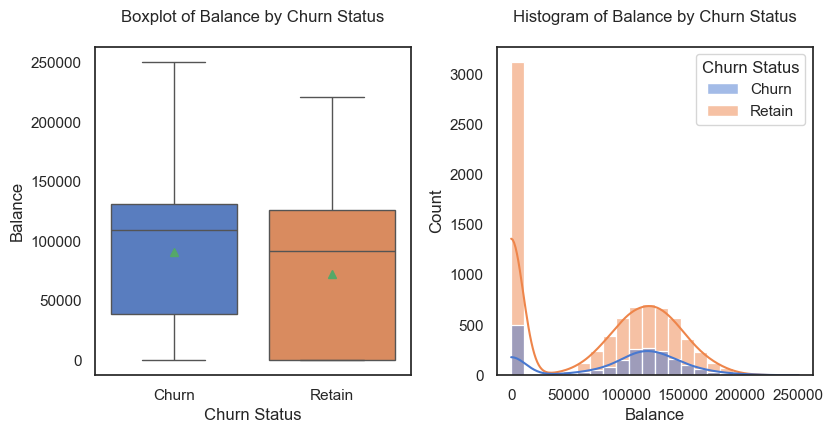

In [91]:
distribution_bivariate(data2, 'Churn Status', 'Balance', 'Churn Status', 8.5, 4.5, 'Balance')

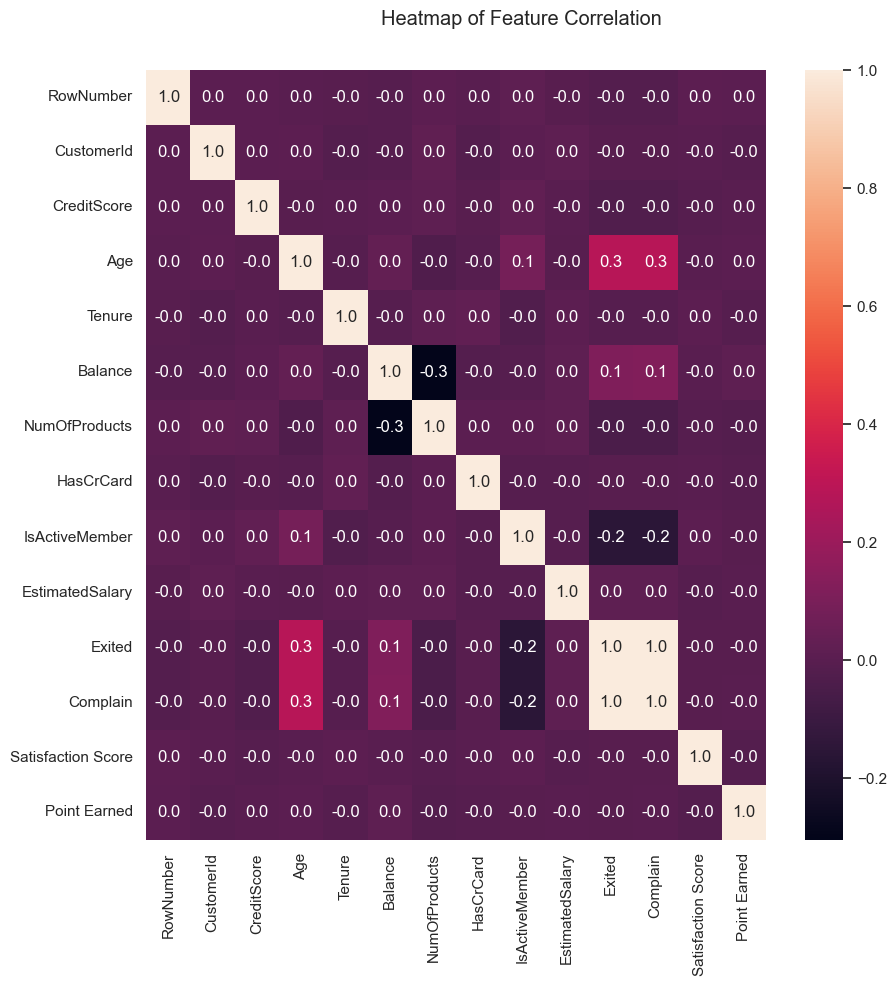

In [99]:
# Initialize chart title
chart = 'Heatmap of Feature Correlation'

# Create a new figure with the specified size and title
plt.figure(figsize=(10, 10))
plt.suptitle(f'{chart}', y=0.94)

# Select only numerical columns for correlation
numerical_data = data.select_dtypes(include=[np.number])

# Plot a heatmap of feature correlation
sns.heatmap(numerical_data.corr(), annot=True, fmt='.1f')

# Display the plot
plt.show()


 Analyzing Churn Rate by Geography and Gender

In [101]:
churnbygeogender = data.groupby(['Geography', 'Gender'])['Exited'].agg(['mean', 'count']).rename(columns={'mean': 'Churn Rate', 'count': 'Customer Count'})
print(churnbygeogender)


                  Churn Rate  Customer Count
Geography Gender                            
France    Female    0.203450            2261
          Male      0.127497            2753
Germany   Female    0.375524            1193
          Male      0.278116            1316
Spain     Female    0.212121            1089
          Male      0.131124            1388


Calculating Overall Churn Rate

In [106]:
# Calculate the overall churn rate
overall_churn_rate = data['Exited'].mean()

# Print the overall churn rate
print(f"Overall Churn Rate: {overall_churn_rate:.2%}")


Overall Churn Rate: 20.38%


Adding Promotion Status Based on Salary

In [112]:
# Initially consider that no one received the promotion by default
data['ReceivedPromotion'] = 0

# Define the threshold salary for receiving a promotion
threshold_salary = 50000

# Mark as received promotion based on the condition
data.loc[data['EstimatedSalary'] > threshold_salary, 'ReceivedPromotion'] = 1
data.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Complain,Satisfaction Score,Card Type,Point Earned,Age Group,ReceivedPromotion
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1,1,2,DIAMOND,464,40-50,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0,1,3,DIAMOND,456,40-50,1
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1,1,3,DIAMOND,377,40-50,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0,0,5,GOLD,350,30-40,1
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0,0,5,GOLD,425,40-50,1


Analyzing Churn Rate by Age Group and Promotion Status

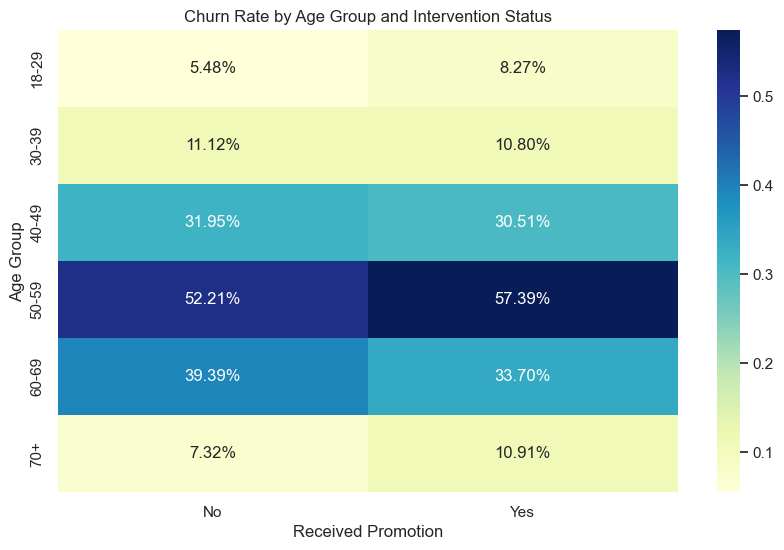

In [116]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Define bins and labels for age groups
bins = [0, 18, 30, 40, 50, 60, 70, 120]
labels = ['<18', '18-29', '30-39', '40-49', '50-59', '60-69', '70+']

# Create the AgeGroup column in the dataset
data['AgeGroup'] = pd.cut(data['Age'], bins=bins, labels=labels, right=False)

# Calculate churn rates by age group and received promotion status
churn_rates = data.groupby(['AgeGroup', 'ReceivedPromotion'], observed=True)['Exited'].mean().reset_index()

# Pivot the churn rates data for heatmap plotting
churn_pivot = churn_rates.pivot(index='AgeGroup', columns='ReceivedPromotion', values='Exited')

# Create a heatmap for churn rate by age group and intervention status
plt.figure(figsize=(10, 6))
sns.heatmap(churn_pivot, annot=True, fmt=".2%", cmap="YlGnBu")
plt.title("Churn Rate by Age Group and Intervention Status")
plt.ylabel("Age Group")
plt.xlabel("Received Promotion")
plt.xticks([0.5, 1.5], ['No', 'Yes'])

# Display the plot
plt.show()


Defining Intervention Types Based on Customer Characteristics

In [122]:
import pandas as pd
import numpy as np

# Define conditions for different intervention types
conditions = [
    (data['ReceivedPromotion'] == 1) & (data['IsActiveMember'] == 1),
    (data['ReceivedPromotion'] == 1) & (data['IsActiveMember'] == 0),
    (data['Age'] > 30) & (data['Age'] <= 50) & (data['Balance'] <= 50000),
    (data['Age'] > 50)
]

# Define choices for intervention types based on the conditions
choices = ['ActivePromotion', 'InactivePromotion', 'MembershipAdjust', 'ReducedFees']

# Create a new column 'InterventionType' based on the conditions and choices
data['InterventionType'] = np.select(conditions, choices, default='None')
data.head()


,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,...,EstimatedSalary,Exited,Complain,Satisfaction Score,Card Type,Point Earned,Age Group,ReceivedPromotion,AgeGroup,InterventionType
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,...,101348.88,1,1,2,DIAMOND,464,40-50,1,40-49,ActivePromotion
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,...,112542.58,0,1,3,DIAMOND,456,40-50,1,40-49,ActivePromotion
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,...,113931.57,1,1,3,DIAMOND,377,40-50,1,40-49,InactivePromotion
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,...,93826.63,0,0,5,GOLD,350,30-40,1,30-39,InactivePromotion
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,...,79084.10,0,0,5,GOLD,425,40-50,1,40-49,ActivePromotion


Visualizing Churn Rate by Intervention Type Across Age Groups

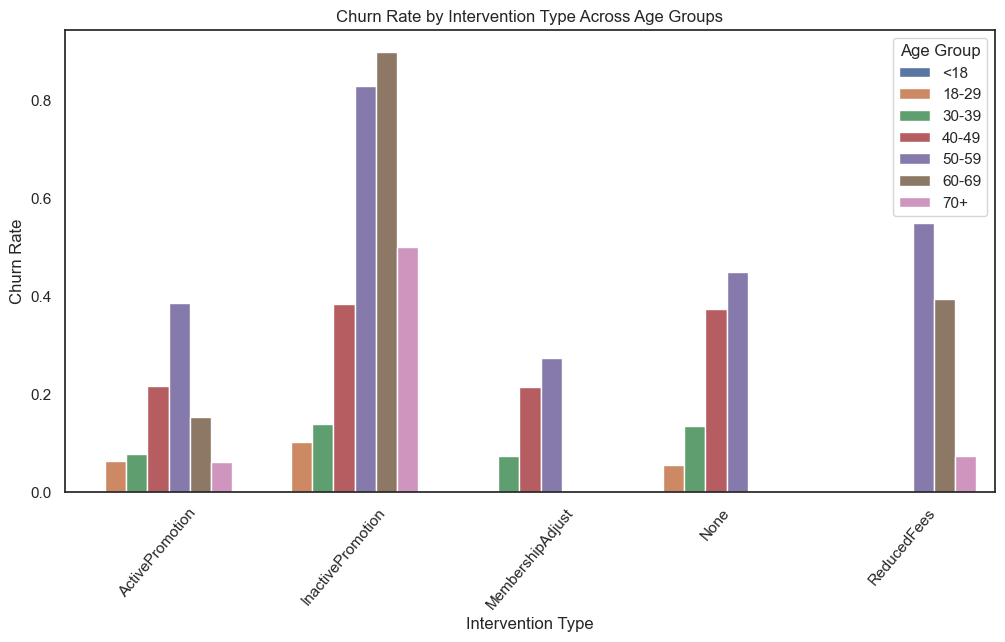

In [126]:
# Calculate churn rates by intervention type and age group
churn_rates = data.groupby(['InterventionType', 'AgeGroup'], observed=True)['Exited'].mean().reset_index()

# Create a bar plot for churn rate by intervention type across age groups
plt.figure(figsize=(12, 6))
sns.barplot(x='InterventionType', y='Exited', hue='AgeGroup', data=churn_rates)

# Set the title and labels for the plot
plt.title('Churn Rate by Intervention Type Across Age Groups')
plt.xlabel('Intervention Type')
plt.ylabel('Churn Rate')

# Rotate x-axis labels for better readability
plt.xticks(rotation=50)

# Set the legend title
plt.legend(title='Age Group')

# Display the plot
plt.show()


 Visualizing Effectiveness of Different Interventions Across Regions

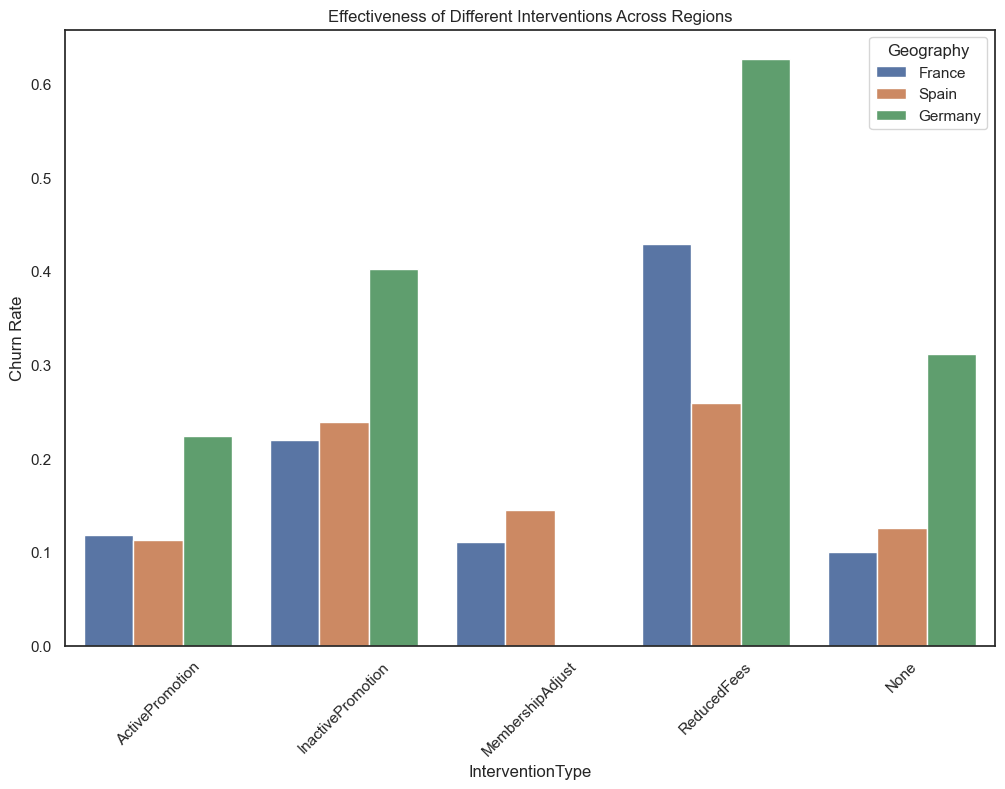

In [130]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# Create a bar plot for the effectiveness of different interventions across regions
plt.figure(figsize=(12, 8))
sns.barplot(x='InterventionType', y='Exited', hue='Geography', data=data, errorbar=None)

# Set the title and labels for the plot
plt.title('Effectiveness of Different Interventions Across Regions')
plt.ylabel('Churn Rate')

# Rotate x-axis labels for better readability
plt.xticks(rotation=45)

# Display the plot
plt.show()


 Visualizing Churn Rate by Intervention Type

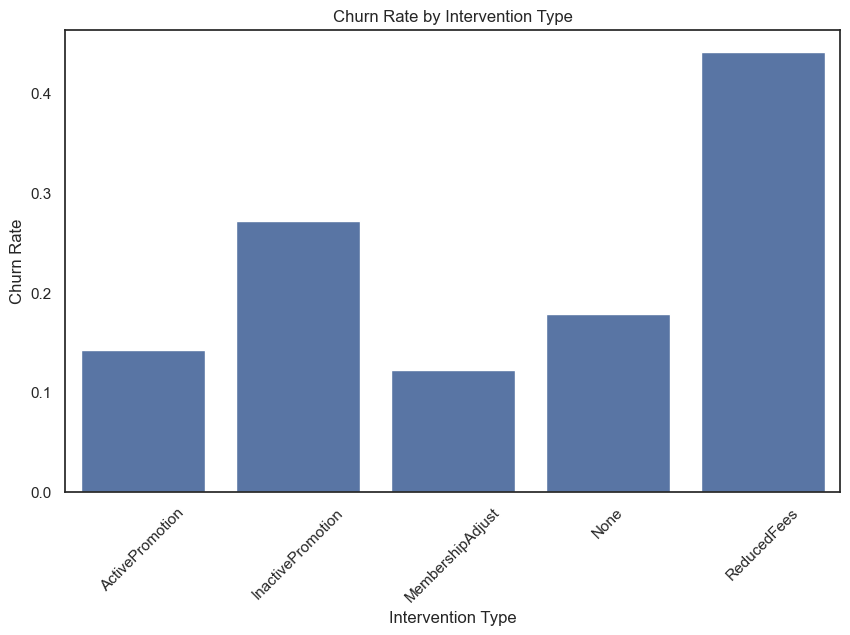

In [134]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Calculate churn rates by intervention type
churn_rates_by_intervention = data.groupby('InterventionType')['Exited'].mean().reset_index()

# Create a bar plot for churn rate by intervention type
plt.figure(figsize=(10, 6))
sns.barplot(x='InterventionType', y='Exited', data=churn_rates_by_intervention)

# Set the title and labels for the plot
plt.title('Churn Rate by Intervention Type')
plt.xlabel('Intervention Type')
plt.ylabel('Churn Rate')

# Rotate x-axis labels for better readability
plt.xticks(rotation=45)

# Display the plot
plt.show()


Visualizing Churn Rate by Card Type

  Card Type  Churn Rate
0   DIAMOND    0.217790
1      GOLD    0.192646
2  PLATINUM    0.203607
3    SILVER    0.201122


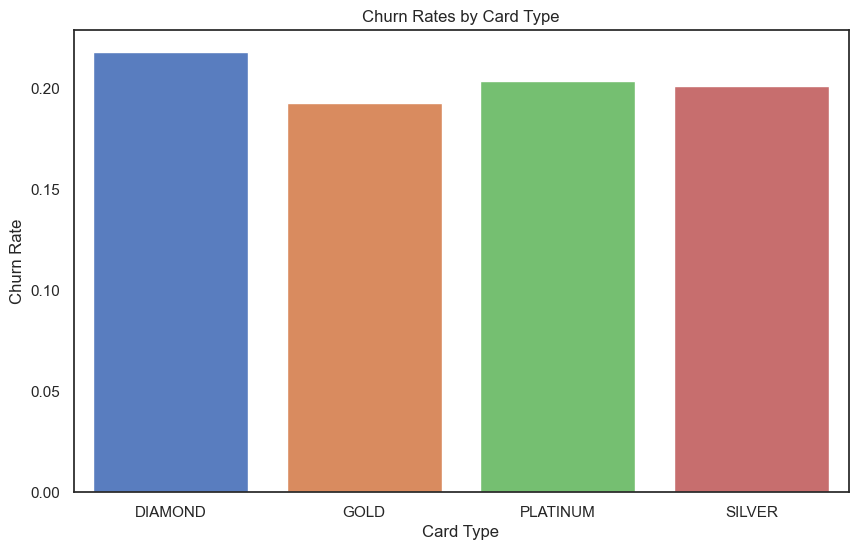

In [140]:
import seaborn as sns
import matplotlib.pyplot as plt

# Calculate churn rate by card type
churn_by_card_type = data.groupby('Card Type')['Exited'].mean().reset_index()

# Rename columns for better understanding
churn_by_card_type.columns = ['Card Type', 'Churn Rate']

# Display the churn rates by card type
print(churn_by_card_type)

# Plot the churn rates by card type
plt.figure(figsize=(10, 6))
sns.barplot(x='Card Type', y='Churn Rate', data=churn_by_card_type, palette='muted')

# Set the title and labels for the plot
plt.title('Churn Rates by Card Type')
plt.xlabel('Card Type')
plt.ylabel('Churn Rate')

# Display the plot
plt.show()
